# Training

**Goal:** To derive predictions from the dataset using the following models:
- XGBoost
- Linear Regression
- Logistic Regression
- Support Vector Machines (SVM)

**Load Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load data
data = pd.read_csv("../data/knight_hacks_dues_processed.csv")

# Convert class to a numeric value for use with Logistic Regression
for i, val in enumerate(data["class"]):
    if val == "Freshman":
        data.at[i, "class"] = 1
    elif val == "Sophomore":
        data.at[i, "class"] = 2
    elif val == "Junior":
        data.at[i, "class"] = 3
    elif val == "Senior":
        data.at[i, "class"] = 4
    else:
        data.at[i, "class"] = 5

data["class"] = data["class"].astype(int)

# Set features and target
drop = ["y_paid_dues", "school_grouped", "major_grouped"]

X = data.drop(columns=drop)
y = data["y_paid_dues"]

# Prefers XGBoost: 10
# Prefers Logistic Regression: 99
seed = None

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**XGBoost**

In [ ]:
# Optimize hyperparameters

param_list = {
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'max_depth': list(range(1,12)),
    "lambda": list(range(0,5)),
    "alpha": list(range(0,5)),
    'eta': list(np.linspace(0, 1, 10)),
    'min_child_weight': list(range(0,5)),
}

model = xgb.XGBClassifier()
gscv = GridSearchCV(model, param_list, scoring='accuracy', n_jobs=-1, cv=3, verbose=2)
gscv.fit(X_train, y_train)
print("Best Parameters:", gscv.best_params_)

Fitting 3 folds for each of 13750 candidates, totalling 41250 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'alpha': [0, 1, ...], 'eta': [np.float64(0.0), np.float64(0.1111111111111111), ...], 'eval_metric': ['auc'], 'lambda': [0, 1, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


XGBoost Val Accuracy: 0.7771
XGBoost Test Accuracy: 0.6952


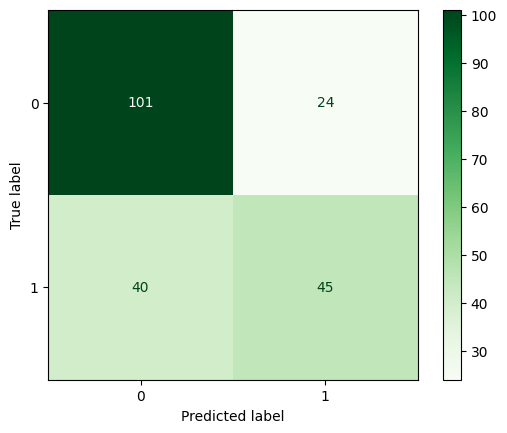

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

xg_model = xgb.XGBClassifier(**gscv.best_params_)
xg_model.fit(X_train, y_train)

xg_pred_v = xg_model.predict(X_val)
xg_pred_ts = xg_model.predict(X_test)

xg_acc_v = accuracy_score(y_val, xg_pred_v)
xg_acc_ts = accuracy_score(y_test, xg_pred_ts)
print(f"XGBoost Val Accuracy: {xg_acc_v:.4f}")
print(f"XGBoost Test Accuracy: {xg_acc_ts:.4f}")

cf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, xg_pred_ts), display_labels=xg_model.classes_)
cf.plot(cmap=plt.cm.Greens)

**Logistic Regression**

In [1257]:
param_list = {
    "C": [0.01, 0.1, 0.5, 1, 2, 5, 10],
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'saga'],
    "max_iter": [3000]
}

model = LogisticRegression()
gscv = GridSearchCV(model, param_list, scoring='accuracy', n_jobs=-1, cv=3, verbose=0)
gscv.fit(X_train, y_train)
print("Best Parameters:", gscv.best_params_)

Best Parameters: {'C': 0.5, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}


c:\Users\Glitc\Documents\final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
189 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Glitc\Documents\final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Glitc\Documents\final-project\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Glitc\Documents\final-project\.venv\Lib\

Best Parameters: {'C': 0.5, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Val Accuracy: 0.7452
Logistic Regression Test Accuracy: 0.7714


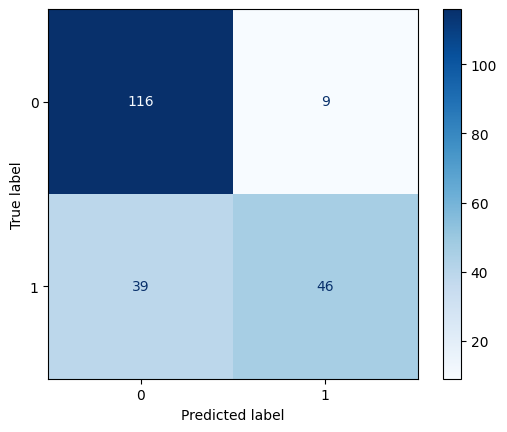

In [1261]:
print("Best Parameters:", gscv.best_params_)

lr_model = LogisticRegression(**gscv.best_params_).fit(X_train, y_train)
lr_pred_v = lr_model.predict(X_val)
lr_pred_ts = lr_model.predict(X_test)

lr_acc_v = accuracy_score(y_val, lr_pred_v)
lr_acc_ts = accuracy_score(y_test, lr_pred_ts)
print(f"Logistic Regression Val Accuracy: {lr_acc_v:.4f}")
print(f"Logistic Regression Test Accuracy: {lr_acc_ts:.4f}")

cf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lr_pred_ts), display_labels=lr_model.classes_)
cf.plot(cmap=plt.cm.Blues)